In [1]:
# Parameters cell for papermill launching
work_dir <- "./intermediate_branch_data/Nov-2023-log10"

In [2]:
# Parameters
work_dir = "./intermediate_branch_data/Nov-2023-log10-DO-update-correct"


In [3]:
# Installs just fine
#install.packages("knitr", repos='http://cran.us.r-project.org', quiet=FALSE, Ncpu=4)

# haven package compiles but cannot link to libiconv even though available in .miniconda/libs/
# This failure spills over to prevent tidyverse from installing. Instead, install tidyverse
# as an
#install.packages("haven", repos='http://cran.us.r-project.org', quiet=FALSE, Ncpu=4, keep_outputs=TRUE, configure.args=c(haven = '-L/usr/local/lib'))
#install.packages("tidyverse", repos='http://cran.us.r-project.org', quiet=FALSE, Ncpu=4)

# This takes a few mins to install and works, but has version incompatibilities
# with other packages, so unlikely to work with conda install r-tidyverse.
# Replace with conda install -c conda-forge r-colourpicker
#install.packages("colourpicker", repos='http://cran.us.r-project.org', quiet=FALSE, Ncpu=4)

# Example for compiler flag specifications on individual package installs
#install.packages(c("ncdf4", "RNetCDF"),
#  configure.args = c(RNetCDF = "--with-netcdf-include=/usr/include/udunits2"))

# Will fail if RStudio is not running.
#install.packages("rstudioapi", repos='http://cran.us.r-project.org', quiet=TRUE)

#library(knitr)
#knitr::opts_chunk$set(echo = TRUE)

#current_path <- rstudioapi::getActiveDocumentContext()$path 
setwd(work_dir)

# Confirmation of change directory
#getwd()

 - import libraries

In [4]:
# library(tidyverse)
# #library(colourpicker)
# library(lubridate)
# library(emmeans)
# #library(sf)
# #library(ggspatial)
# library(spData)
# #library(ggpmisc)
# #install.packages("ggpubr")
# #library("rstudioapi")
# #install.packages("ggExtra")
# library(ggExtra)
# library(patchwork)

In [5]:
library(tidyverse)
library(ggExtra)
#library(ggpmisc)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Scatter plot  
- using new merged dataset to create scatter plot
- add kernel densities to the plots (along the side)

In [6]:
#some filtering/mutating first 
#C:/Users/b923w423/Documents/GitHub/ICON-ModEx_Open_Manuscript

combods_split <- read_csv("ICON-ModEx_Combined_Predicted_Observed_Respiration_Rates.csv", na = c(-9999, "N/A", "NA", NA)) %>%
#remova Na's
  #split data set into "hot" and "cold" spots
  mutate(ds_split = ifelse(Log_Observed_Normalized_Respiration_Rate > 2.7, "500+",                         ifelse(Log_Observed_Normalized_Respiration_Rate < 2.7, "500-", "500-") )) %>% 
  
#clasifying by quadrant (hot, cold, misclass hot, misclass cold) by year
# Need to get rid of the year because we are working year-by-year
  mutate(ds_quadrant23 =                                                    ifelse(Log_Observed_Normalized_Respiration_Rate > 2.7 & Log_Predicted_Normalized_Respiration_Rate > 2.7 , "hs23",
  ifelse(Log_Observed_Normalized_Respiration_Rate > 2.7 & Log_Predicted_Normalized_Respiration_Rate < 2.7 , "misclass_hs23",                                                                                              
ifelse(Log_Observed_Normalized_Respiration_Rate < 2.7 & Log_Predicted_Normalized_Respiration_Rate < 2.7 , "cs23",    
ifelse(Log_Observed_Normalized_Respiration_Rate < 2.7 & Log_Predicted_Normalized_Respiration_Rate > 2.7 , "misclass_cs23", NA)))) ) #,                   
      
#ds_quadrant19 =        
# ifelse(Log_Observed_Normalized_Respiration_Rate > 2.7 & Log_Predicted_Normalized_Respiration_Rate_Sep2019 > 2.7 , "hs19",
#  ifelse(Log_Observed_Normalized_Respiration_Rate > 2.7 & Log_Predicted_Normalized_Respiration_Rate_Sep2019 < 2.7 , "misclass_hs19",  
# ifelse(Log_Observed_Normalized_Respiration_Rate < 2.7 & Log_Predicted_Normalized_Respiration_Rate_Sep2019 > 2.7 , "misclass_cs19",
#ifelse(Log_Observed_Normalized_Respiration_Rate < 2.7 & Log_Predicted_Normalized_Respiration_Rate_Sep2019 < 2.7 , "cs19", NA ) )))) 

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


Rows: 684 Columns: 19


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Sample_ID
dbl (17): Sample_Longitude_obs, Sample_Latitude_obs, Mean_Temp_Deg_C, pH, Me...
lgl  (1): Mean_DO_percent_saturation



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Scatter plot
 - needs to have kernel density plots on y and x axis
 - needs use log data
 - needs to have overall line, line for above 500, below 500, and R^2 values for all three
 - facet wrap or color dots by iteration (first versus last)
 
 - right now s19s iteration, but want OG 0th iteration

In [7]:
# #this will change - waiting on real 0th iteration data from Stefan/Brie
# firstiterationds <- combods_filt %>% filter(str_detect(Sample_Name, "S19S"))

# #run 3 lm up here, then extract R^2, then call into annotate 
# lm_all <- lm(Log_Predicted_Normalized_Respiration_Rate_Sep2019 ~ Log_Observed_Normalized_Respiration_Rate, firstiterationds)
# summary(lm_all)

# lm_sup <- lm(Log_Predicted_Normalized_Respiration_Rate_Sep2019 ~ Log_Observed_Normalized_Respiration_Rate, firstiterationds %>% filter(ds_split == "500+"))
# summary(lm_sup)

# lm_sub <- lm(Log_Predicted_Normalized_Respiration_Rate_Sep2019 ~ Log_Observed_Normalized_Respiration_Rate, firstiterationds %>% filter(ds_split == "500-"))
# summary(lm_sub)

# #plot
# fullscatter_firstiteration <- 
#  firstiterationds %>%
#     ggplot(aes(abs(Log_Observed_Normalized_Respiration_Rate ),
#                       abs(Log_Predicted_Normalized_Respiration_Rate_Sep2019) )) +
#                       #,  color =  ds_split))+ 
# #to see R^2 for above/below thresholds, remove color grouping above and use stat poly eq fx (below)
#   geom_point(color = "darkgrey", size = 3, pch = 21) + 
#     geom_vline (xintercept = 2.7, linetype = "dashed", color="grey") + 
#     geom_hline (yintercept = 2.7, linetype = "dashed", color="dark grey") + #not a clear threshold 
 
   
#         geom_abline (linetype = "longdash", color="black") + #not a clear threshold 
#    stat_poly_line(color = "black", alpha = 0.5) + #overall best fit
#  # stat_poly_eq(use_label(c( "R2"))) + #remove hashtag to see R^2 of log500 split
#     geom_smooth( aes(abs(Log_Observed_Normalized_Respiration_Rate), #above/below threshold best fit
#                       abs(Log_Predicted_Normalized_Respiration_Rate_Sep2019),
#                       color =  ds_split), method = "lm", alpha = 0.2) + 
#   xlab("log10(Observed rates)") + 
#   ylab("log10(Predicted rates)") + 
# scale_shape_manual(values = c(21, 16)) + #shape or color by iteration
#   scale_color_manual(values = c( "lightblue", "maroon")) +

# annotate('text', label = str_c('R^2 == ', round(summary(lm_all)$r.squared, 2)), parse = T, x = 3.5, y = 0.75, size = 5, family = 'serif', color = "black")+
# annotate('text', label = str_c('R^2 == ', round(summary(lm_sub)$r.squared, 2)), parse = T, x = 3.5, y = 0.5, size = 5, family = 'serif', color="lightblue")+
# annotate('text', label = str_c('R^2 == ', round(summary(lm_sup)$r.squared, 2)), parse = T, x = 3.5, y = 0.25, size = 5, family = 'serif',  color="maroon")+
#   lims(y = c(0,4), x = c(0,4)) + 
#   theme_classic() +
#    theme(text = element_text(size = 16,  family = 'serif'), 
#          legend.position = 0)
# fullscatter_firstiteration

# #adding density plots on axes
# ggExtra::ggMarginal(fullscatter_firstiteration, fill = "lightgrey")

# #save file
# ggsave(filename = "Scripts/fullscatter_firstiteration.tiff", plot = fullscatter_firstiteration, width = 6, height = 6, dpi = 300)   
 
 

 - final iteration 

In [8]:
# Make certain initialize plotting environmnet in Notebook:
# 

#add in lm's
#run 3 lm up here, then extract R^2, then call into annotate 
lm_all_final <- lm(Log_Predicted_Normalized_Respiration_Rate ~ Log_Observed_Normalized_Respiration_Rate, combods_split)
summary(lm_all_final)

lm_sup_final <- lm(Log_Predicted_Normalized_Respiration_Rate ~ Log_Observed_Normalized_Respiration_Rate, combods_split %>% filter(ds_split == "500+"))
summary(lm_sup_final)

lm_sub_final <- lm(Log_Predicted_Normalized_Respiration_Rate ~ Log_Observed_Normalized_Respiration_Rate, combods_split %>% filter(ds_split == "500-"))
summary(lm_sub_final)



fullscatter_lastiteration <- 
  combods_split %>% ggplot(aes(abs(Log_Observed_Normalized_Respiration_Rate ),
                      abs(Log_Predicted_Normalized_Respiration_Rate) #)) + #
                      ,  color =  ds_split))+ 
#to see R^2 for above/below thresholds, remove color grouping above and use stat poly eq fx (below)
  geom_point(color = "darkgrey", size = 3, pch = 21) + 
    geom_vline (xintercept = 2.7, linetype = "dashed", color="grey") + 
    geom_hline (yintercept = 2.7, linetype = "dashed", color="dark grey") + #not a clear threshold 
      geom_abline (linetype = "longdash", color="black") + #not a clear threshold

# Required by ggextra, fails to import above. Where are the other lines (blue and red) plotted?
     #ggpmisc::stat_poly_line(color = "black", alpha = 0.5) + #overall best fit


# stat_poly_eq(use_label(c( "R2"))) + #remove hashtag to see R^2 of log500 split
 
    geom_smooth( aes(abs(Log_Observed_Normalized_Respiration_Rate ), #above/below threshold best fit
                      abs(Log_Predicted_Normalized_Respiration_Rate),
                      color =  ds_split), method = "lm", alpha = 0.2) + 
    geom_smooth( aes(abs(Log_Observed_Normalized_Respiration_Rate ), #above/below threshold best fit
                      abs(Log_Predicted_Normalized_Respiration_Rate)), method = "lm", alpha = 0.2,
                      color =  "black") +
  xlab("log10(Observed rates)") + 
  ylab("log10(Predicted rates)") + 
scale_shape_manual(values = c(21, 16)) + #shape or color by iteration
  scale_color_manual(values = c( "lightblue", "maroon")) +

annotate('text', label = str_c('R^2 == ', round(summary(lm_all_final)$r.squared, 2)), parse = T, x = 3.5, y = 0.75, size = 5, family = 'serif', color = "black")+
annotate('text', label = str_c('R^2 == ', round(summary(lm_sub_final)$r.squared, 2)), parse = T, x = 3.5, y = 0.5, size = 5, family = 'serif', color="lightblue")+
annotate('text', label = str_c('R^2 == ', round(summary(lm_sup_final)$r.squared, 2)), parse = T, x = 3.5, y = 0.25, size = 5, family = 'serif',  color="maroon")+
    
  lims(y = c(0,4), x = c(0,4)) + 
  theme_classic() +
   theme(text = element_text(size = 16, family = 'serif'), 
         legend.position = 0)

#adding density plots on axes
 histograms <- ggExtra::ggMarginal(fullscatter_lastiteration, fill = "lightgrey")
 
# Original plot save in tidy
ggsave(filename = "./scatter.png", plot = histograms, width = 6, height = 6, dpi = 300)  
#ggsave(filename = "./scatter.pdf", plot = fullscatter_lastiteration, width = 6, height = 6, units="in", dpi = 300, device="pdf")  
# View plot inline
#histograms

# Alternative in base
#png("./scatter.png")
#print(histograms)
#print(fullscatter_lastiteration)
#dev.off()


Call:
lm(formula = Log_Predicted_Normalized_Respiration_Rate ~ Log_Observed_Normalized_Respiration_Rate, 
    data = combods_split)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8260 -0.1800 -0.0363  0.1710  1.1483 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               1.58920    0.01712   92.82   <2e-16
Log_Observed_Normalized_Respiration_Rate  0.42866    0.01029   41.66   <2e-16
                                            
(Intercept)                              ***
Log_Observed_Normalized_Respiration_Rate ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2625 on 682 degrees of freedom
Multiple R-squared:  0.7179,	Adjusted R-squared:  0.7175 
F-statistic:  1736 on 1 and 682 DF,  p-value: < 2.2e-16



Call:
lm(formula = Log_Predicted_Normalized_Respiration_Rate ~ Log_Observed_Normalized_Respiration_Rate, 
    data = combods_split %>% filter(ds_split == "500+"))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99171 -0.05417  0.07124  0.13804  0.45871 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               -0.9284     0.5432  -1.709   0.0908
Log_Observed_Normalized_Respiration_Rate   1.2238     0.1619   7.561 2.92e-11
                                            
(Intercept)                              .  
Log_Observed_Normalized_Respiration_Rate ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2888 on 92 degrees of freedom
Multiple R-squared:  0.3832,	Adjusted R-squared:  0.3765 
F-statistic: 57.17 on 1 and 92 DF,  p-value: 2.92e-11



Call:
lm(formula = Log_Predicted_Normalized_Respiration_Rate ~ Log_Observed_Normalized_Respiration_Rate, 
    data = combods_split %>% filter(ds_split == "500-"))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38166 -0.15176 -0.07268  0.10778  1.16090 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               1.73476    0.01830   94.79   <2e-16
Log_Observed_Normalized_Respiration_Rate  0.26449    0.01538   17.20   <2e-16
                                            
(Intercept)                              ***
Log_Observed_Normalized_Respiration_Rate ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2232 on 588 degrees of freedom
Multiple R-squared:  0.3346,	Adjusted R-squared:  0.3335 
F-statistic: 295.7 on 1 and 588 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


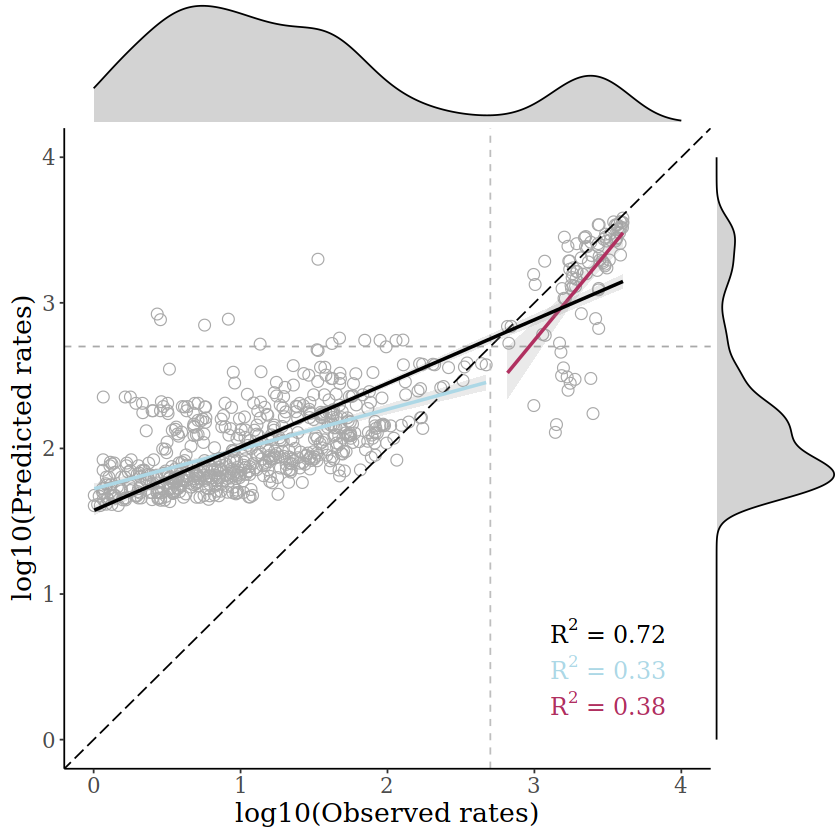

In [9]:
histograms

- exploring misclass patterns

In [10]:
# combods_date <- combods_split %>%
#    mutate(Date_whole = ymd(Observed_Sample_Date), Year = year(Observed_Sample_Date), Month = month(Observed_Sample_Date), Day = day(Observed_Sample_Date))
 


# #based on previous plots, temporal outliers are from 2023 only
# combods_date %>% ggplot(aes(abs(Log_Observed_Normalized_Respiration_Rate),
#                       abs(Log_Predicted_Normalized_Respiration_Rate_Nov2023), color = Year ))+ 
# #to see R^2 for above/below thresholds, remove color grouping above and use stat poly eq fx (below)
#   geom_point( pch = 21, size = 3) + 
#     geom_vline (xintercept = 2.7, linetype = "dashed", color="grey") + 
#     geom_hline (yintercept = 2.7, linetype = "dashed", color="dark grey") + #not a clear threshold 
#       geom_abline (linetype = "longdash", color="black") + #not a clear threshold 
#   # stat_poly_line(color = "black", alpha = 0.5) + #overall best fit
#   #stat_poly_eq(use_label(c( "R2"))) + #remove hashtag to see R^2 of log500 split
#   # scale_color_gradientn(colours = rev(rainbow(12))) +

#    # geom_smooth( aes(abs(Log_Observed_Normalized_Respiration_Rate ), #above/below threshold best fit
#     #                  abs(Log_Predicted_Normalized_Respiration_Rate_Nov2023),
#      #                 color =  ds_split), method = "lm", alpha = 0.2) +
  
#   xlab("log10(Observed rates)") + 
#   ylab("log10(Predicted rates)") + 
#   lims(y = c(0,4), x = c(0,4)) + 
#   theme_classic() +
#    theme(text = element_text(size = 16))


  
  

- checking classifications

In [11]:
# #to check that classifications are correct
# combods_date %>% ggplot(aes(abs(Log_Observed_Normalized_Respiration_Rate),
#                       abs(Log_Predicted_Normalized_Respiration_Rate_Nov2023),  color =  ds_quadrant23))+ 
# #to see R^2 for above/below thresholds, remove color grouping above and use stat poly eq fx (below)
#   geom_point( pch = 21) + 
#     geom_vline (xintercept = 2.7, linetype = "dashed", color="grey") + 
#     geom_hline (yintercept = 2.7, linetype = "dashed", color="dark grey") + #not a clear threshold 
#       geom_abline (linetype = "longdash", color="black") + #not a clear threshold 
#   # stat_poly_line(color = "black", alpha = 0.5) + #overall best fit
#   #stat_poly_eq(use_label(c( "R2"))) + #remove hashtag to see R^2 of log500 split
#    #scale_color_gradientn(colours = rev(rainbow(12))) +

#    # geom_smooth( aes(abs(Log_Observed_Normalized_Respiration_Rate ), #above/below threshold best fit
#     #                  abs(Log_Predicted_Normalized_Respiration_Rate_Nov2023),
#      #                 color =  ds_split), method = "lm", alpha = 0.2) +
  
#   xlab("log10(Observed rates+1)") + 
#   ylab("log10(Predicted rates+1)") + 
#   lims(y = c(0,4), x = c(0,4)) + 
#   theme_classic() +
#    theme(text = element_text(size = 16))

  
 
# combods_date %>% ggplot(aes(abs(Log_Observed_Normalized_Respiration_Rate),
#                       abs(Log_Predicted_Normalized_Respiration_Rate_Sep2019),  color = ds_quadrant19 ))+ 
# #to see R^2 for above/below thresholds, remove color grouping above and use stat poly eq fx (below)
#   geom_point( pch = 21) + 
#     geom_vline (xintercept = 2.7, linetype = "dashed", color="grey") + 
#     geom_hline (yintercept = 2.7, linetype = "dashed", color="dark grey") + #not a clear threshold 
#       geom_abline (linetype = "longdash", color="black") + #not a clear threshold 
#   # stat_poly_line(color = "black", alpha = 0.5) + #overall best fit
#   #stat_poly_eq(use_label(c( "R2"))) + #remove hashtag to see R^2 of log500 split
#   # scale_color_gradientn(colours = rev(rainbow(12))) +

#    # geom_smooth( aes(abs(Log_Observed_Normalized_Respiration_Rate ), #above/below threshold best fit
#                      # abs(Log_Predicted_Normalized_Respiration_Rate),
#                      # color =  ds_split), method = "lm", alpha = 0.2) +
  
#   xlab("log10(Observed rates+1)") + 
#   ylab("log10(Predicted rates+1)") + 
#   lims(y = c(0,4), x = c(0,4)) + 
#   theme_classic() +
#    theme(text = element_text(size = 16))

#map to see miss-classifications spatially
  - NA's not filtered out?

In [12]:
# usa <- st_as_sf(maps::map("state", fill=TRUE, plot =FALSE))

# outliers2023 <- 
# ggplot(usa) +
#   geom_sf(color = "#2b2b2b", fill = "lightgrey", size=0.125, alpha = 0.15) +
#   coord_sf(crs = st_crs("+proj=laea +lat_0=45 +lon_0=-100 +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs"), datum = NA) +
#    geom_spatial_point(data=combods_date, aes(x=Longitude, y=Latitude, color = ds_quadrant23), size = 3) + 
#                scale_color_manual(values=c(   "#B9D3EE", "maroon", "darkgrey", "#CDBA96" ) )+
#      ylab("") + 
#   xlab("Longitude") + 
#     theme_minimal() +
#    labs(title="2023 iteration")
# outliers2023

# outliers2019 <- 
# ggplot(usa) +
#   geom_sf(color = "#2b2b2b", fill = "lightgrey", size=0.125, alpha = 0.15) +
#   coord_sf(crs = st_crs("+proj=laea +lat_0=45 +lon_0=-100 +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs"), datum = NA) +
#    geom_spatial_point(data=combods_date, aes(x=Longitude, y=Latitude, color = ds_quadrant19), size = 3) + 
#                scale_color_manual(values=c(   "#B9D3EE", "maroon", "darkgrey", "#CDBA96" ) )+
#      ylab("Latitude") + 
#   xlab("Longitude") + 
#     theme_minimal() + 
#   theme(legend.position = 0)+
#      labs(title="2022 iteration")



# misclassmap <- outliers2019 + outliers2023
# misclassmap


# ggsave(filename = "Scripts/misclassmap.tiff", plot = misclassmap, width = 10, height = 5, dpi = 300)   
